<h1 style='font-size:20px;text-align: center'>
How to restore Aqua MODIS band 06 missing pixels 
<br>using a nonlinear regression based on Gaussian processes ?: 
<br> An application based on python and Scikit-Learn.
</h1>

<p style='text-align: center'>
Author: Benjamin Marchant 
<br>(marchant.benjamin01@gmail.com)
<br>(benjamin.marchant@nasa.gov)
<br> v1.0.0
</p>

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import warnings

from matplotlib.pyplot import figure
from IPython.core.display import HTML
from pyhdf.SD import SD, SDC 

warnings.filterwarnings('ignore')

In [30]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [31]:
myd021km_file = SD('MYD021KM.A2007219.2010.006.2012077031102.hdf', SDC.READ)

In [32]:
EV_250_Aggr1km_RefSB = myd021km_file.select('EV_250_Aggr1km_RefSB')
EV_500_Aggr1km_RefSB = myd021km_file.select('EV_500_Aggr1km_RefSB')
EV_1KM_RefSB = myd021km_file.select('EV_1KM_RefSB')
EV_1KM_Emissive = myd021km_file.select('EV_1KM_Emissive')

In [33]:
modis_band_dic = {}

In [34]:
#print( EV_250_Aggr1km_RefSB.info() )
EV_250_Aggr1km_RefSB_attributes = EV_250_Aggr1km_RefSB.attributes()
EV_250_Aggr1km_RefSB_scales = EV_250_Aggr1km_RefSB_attributes['reflectance_scales']
EV_250_Aggr1km_RefSB_offsets = EV_250_Aggr1km_RefSB_attributes['reflectance_offsets']
#pprint.pprint(EV_250_Aggr1km_RefSB_attributes )

for idx,i in enumerate(EV_250_Aggr1km_RefSB_attributes['band_names'].split(',')):
    print(idx,i)    
    modis_band_dic[i] = [EV_250_Aggr1km_RefSB,idx]

0 1
1 2


In [35]:
#print( EV_500_Aggr1km_RefSB.info() )
EV_500_Aggr1km_RefSB_attributes = EV_500_Aggr1km_RefSB.attributes()
EV_500_Aggr1km_RefSB_scales = EV_500_Aggr1km_RefSB_attributes['reflectance_scales']
EV_500_Aggr1km_RefSB_offsets = EV_500_Aggr1km_RefSB_attributes['reflectance_offsets']
#pprint.pprint(EV_500_Aggr1km_RefSB_attributes )

for idx,i in enumerate(EV_500_Aggr1km_RefSB_attributes['band_names'].split(',')):
    print(idx,i)
    modis_band_dic[i] = [EV_500_Aggr1km_RefSB,idx]

0 3
1 4
2 5
3 6
4 7


In [36]:
#print( EV_1KM_RefSB.info() )
EV_1KM_RefSB_attributes = EV_1KM_RefSB.attributes()
EV_1KM_RefSB_scales = EV_1KM_RefSB_attributes['reflectance_scales']
EV_1KM_RefSB_offsets = EV_1KM_RefSB_attributes['reflectance_offsets']
#pprint.pprint(EV_1KM_RefSB_attributes )

for idx,i in enumerate(EV_1KM_RefSB_attributes['band_names'].split(',')):
    print(idx,i)
    modis_band_dic[i] = [EV_1KM_RefSB,idx]

0 8
1 9
2 10
3 11
4 12
5 13lo
6 13hi
7 14lo
8 14hi
9 15
10 16
11 17
12 18
13 19
14 26


In [37]:
print( EV_1KM_Emissive.info() )
EV_1KM_Emissive_attributes = EV_1KM_Emissive.attributes()
EV_1KM_Emissive_scales = EV_1KM_Emissive_attributes['radiance_scales']
EV_1KM_Emissive_offsets = EV_1KM_Emissive_attributes['radiance_offsets']
#pprint.pprint(EV_1KM_Emissive_attributes )

for idx,i in enumerate(EV_1KM_Emissive_attributes['band_names'].split(',')):
    print(idx,i)
    modis_band_dic[i] = [EV_1KM_Emissive,idx]

('EV_1KM_Emissive', 3, [16, 2030, 1354], 23, 8)
0 20
1 21
2 22
3 23
4 24
5 25
6 27
7 28
8 29
9 30
10 31
11 32
12 33
13 34
14 35
15 36


In [38]:
for key in modis_band_dic:
    print(key, modis_band_dic[key][0].info()[0], modis_band_dic[key][1])

1 EV_250_Aggr1km_RefSB 0
2 EV_250_Aggr1km_RefSB 1
3 EV_500_Aggr1km_RefSB 0
4 EV_500_Aggr1km_RefSB 1
5 EV_500_Aggr1km_RefSB 2
6 EV_500_Aggr1km_RefSB 3
7 EV_500_Aggr1km_RefSB 4
8 EV_1KM_RefSB 0
9 EV_1KM_RefSB 1
10 EV_1KM_RefSB 2
11 EV_1KM_RefSB 3
12 EV_1KM_RefSB 4
13lo EV_1KM_RefSB 5
13hi EV_1KM_RefSB 6
14lo EV_1KM_RefSB 7
14hi EV_1KM_RefSB 8
15 EV_1KM_RefSB 9
16 EV_1KM_RefSB 10
17 EV_1KM_RefSB 11
18 EV_1KM_RefSB 12
19 EV_1KM_RefSB 13
26 EV_1KM_RefSB 14
20 EV_1KM_Emissive 0
21 EV_1KM_Emissive 1
22 EV_1KM_Emissive 2
23 EV_1KM_Emissive 3
24 EV_1KM_Emissive 4
25 EV_1KM_Emissive 5
27 EV_1KM_Emissive 6
28 EV_1KM_Emissive 7
29 EV_1KM_Emissive 8
30 EV_1KM_Emissive 9
31 EV_1KM_Emissive 10
32 EV_1KM_Emissive 11
33 EV_1KM_Emissive 12
34 EV_1KM_Emissive 13
35 EV_1KM_Emissive 14
36 EV_1KM_Emissive 15


In [39]:
def plot_MODIS_L1(MODIS_band, modis_band_dic):

    data_selected_id = modis_band_dic[str(MODIS_band)][0]
    band_idx = modis_band_dic[str(MODIS_band)][1]
    title = 'MODIS Band' + str(MODIS_band)
    
    figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

    data = EV_500_Aggr1km_RefSB.get()
    data_selected_band = data[band_idx,:,:]
    data_selected_attributes = data_selected_id.attributes()
    _FillValue = data_selected_attributes['_FillValue']
    _FillValue = 65528 # warning wrong _FillValue stored in attributes    

    if modis_band_dic[str(MODIS_band)][0].info()[0] == 'EV_1KM_Emissive':
    
        radiance_scales = data_selected_attributes['radiance_scales']
        radiance_offsets = data_selected_attributes['radiance_offsets']
        data_selected_band[ data_selected_band == _FillValue ] = 0.0
        data_selected_band = (data_selected_band - radiance_offsets[band_idx]) * radiance_scales[band_idx]    
    
    else:
    
        reflectance_scales = data_selected_attributes['reflectance_scales']
        data_selected_band[ data_selected_band == _FillValue ] = 0.0
        data_selected_band = data_selected_band * reflectance_scales[band_idx]

    cmap = [(0.0,0.0,0.0)] + [(cm.jet(i)) for i in range(1,256)] 
    cmap = mpl.colors.ListedColormap(cmap)
    img = plt.imshow(np.fliplr(data_selected_band), cmap=cmap,interpolation='none', origin='lower')
    plt.title(title, fontsize=11)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=8)
    l = [int(i) for i in np.linspace(0,data_selected_band.shape[1],6)]
    plt.xticks(l, [i for i in reversed(l)], rotation=0, fontsize=11 )
    l = [int(i) for i in np.linspace(0,data_selected_band.shape[0],9)]
    plt.yticks(l, l, rotation=0, fontsize=11 )
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)    
    plt.show()

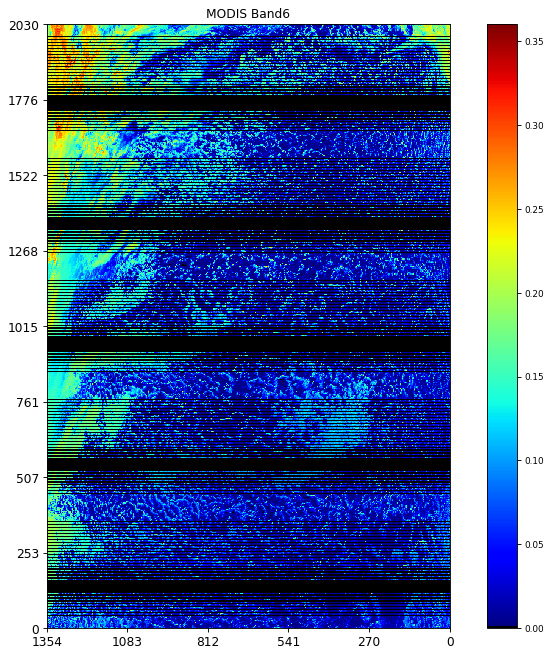

In [40]:
plot_MODIS_L1(6,modis_band_dic)

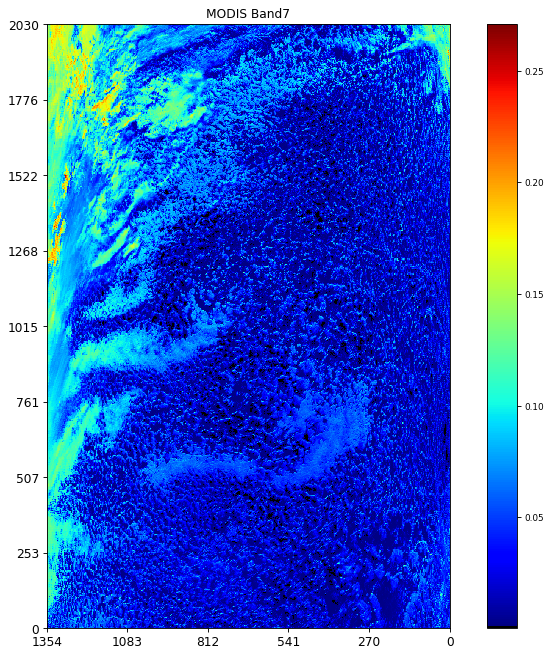

In [41]:
plot_MODIS_L1(7,modis_band_dic)

data_shape -->  (2030, 1354)
nb_missing_rows -->  812
number of missing data -->  1099448
Fraction of missing data -->  40.0


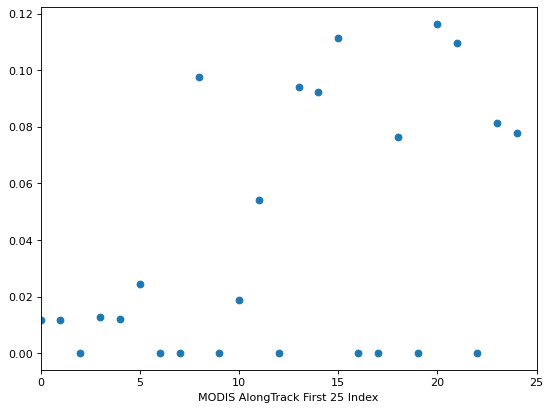

In [42]:
MODIS_band = 6
    
data_selected_id = modis_band_dic[str(MODIS_band)][0]
band_idx = modis_band_dic[str(MODIS_band)][1]

data = EV_500_Aggr1km_RefSB.get()
data_band_06 = data[band_idx,:,:]
data_selected_attributes = data_selected_id.attributes()
_FillValue = data_selected_attributes['_FillValue']
_FillValue = 65528 # warning wrong _FillValue stored in attributes  

reflectance_scales = data_selected_attributes['reflectance_scales']
data_band_06[ data_band_06 == _FillValue ] = 0.0
data_band_06 = data_band_06 * reflectance_scales[band_idx]

data_band_6_vmin = np.min(data_band_06)
data_band_6_vmax = np.max(data_band_06)

data_shape = data_band_06.shape

#print(np.where(data_band_06[:,0]==0.0))

#print(np.where(data_band_06[:,0]==0.0)[0].shape)

nb_missing_rows = np.where(data_band_06[:,0]==0.0)[0].shape[0]

band_06_missing_data_idx = np.where(data_band_06==0.0)

print('data_shape --> ', data_shape)

print('nb_missing_rows --> ', nb_missing_rows)

print('number of missing data --> ', nb_missing_rows * data_shape[1])

print('Fraction of missing data --> ', 100.0 * nb_missing_rows * data_shape[1] / ( data_shape[0] * data_shape[1] ))

#for i in range(100):
#    print(i,data_band_6[i,0])

nbx = 25

x = np.arange(nbx)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x,data_band_06[0:nbx,0])

plt.xlabel('MODIS AlongTrack First 25 Index')

plt.xlim(0,nbx)

plt.show()

plt.close()

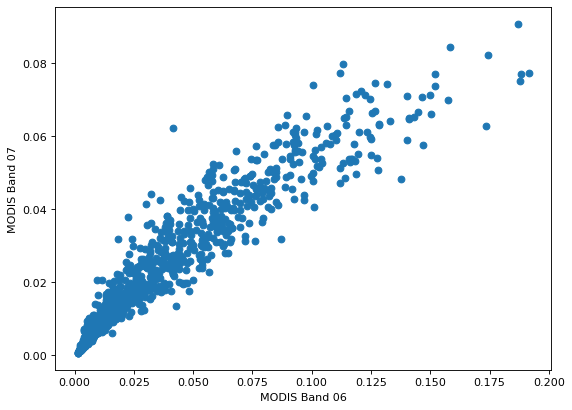

In [43]:
MODIS_band = 7
    
data_selected_id = modis_band_dic[str(MODIS_band)][0]
band_idx = modis_band_dic[str(MODIS_band)][1]

data = EV_500_Aggr1km_RefSB.get()
data_band_07 = data[band_idx,:,:]
data_selected_attributes = data_selected_id.attributes()
_FillValue = data_selected_attributes['_FillValue']
_FillValue = 65528 # warning wrong _FillValue stored in attributes  

reflectance_scales = data_selected_attributes['reflectance_scales']
data_band_07[ data_band_07 == _FillValue ] = 0.0
data_band_07 = data_band_07 * reflectance_scales[band_idx]

a_idx = np.where(data_band_06[:,0]!=0.0)[0]

A = data_band_06[a_idx].ravel()
B = data_band_07[a_idx].ravel()

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(A[0:1000],B[0:1000])

plt.xlabel('MODIS Band 06')
plt.ylabel('MODIS Band 07')

plt.show()

plt.close()

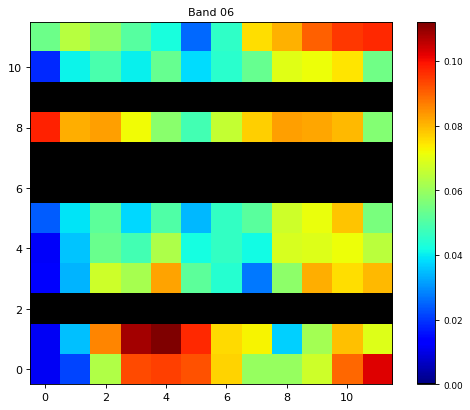

In [44]:
i_start = 0
j_start = 0 

cmap = [(0.0,0.0,0.0)] + [(cm.jet(i)) for i in range(1,256)] 
cmap = mpl.colors.ListedColormap(cmap)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

#img = plt.imshow(np.fliplr(data_band_6[0:12,0:12]), cmap=cmap, 
#                 interpolation='none', origin='lower')

img = plt.imshow(data_band_06[i_start:i_start+12,j_start:j_start+12], cmap=cmap, 
                 interpolation='none', origin='lower')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)

plt.title('Band 06', fontsize=10)

plt.show()

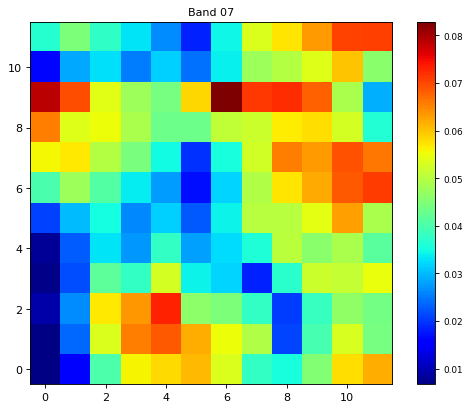

In [45]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

cmap = [(cm.jet(i)) for i in range(1,256)] 
cmap = mpl.colors.ListedColormap(cmap)

img = plt.imshow(data_band_07[i_start:i_start+12,j_start:j_start+12], cmap=cmap, 
                 interpolation='none', origin='lower')

plt.title('Band 07', fontsize=10)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)

plt.show()

plt.close()

In [46]:
#data_sample = data_band_6[0:12,0:12]

data_sample = np.copy(data_band_06[i_start:i_start+12,j_start:j_start+12])

X = np.stack((np.where(data_sample!=0.0)[0],np.where(data_sample!=0.0)[1]), axis=-1)

Y = data_sample[np.where(data_sample!=0.0)[0],np.where(data_sample!=0.0)[1]]

y_min = np.min(Y)
y_max = np.max(Y)

x1_min = np.min(X[:,0]) # Data Scaling
x1_max = np.max(X[:,0]) # Data Scaling

X = X.astype('float64')

X[:,0] = (1.0*X[:,0]-x1_min) / (x1_max-x1_min)

x2_min = np.min(X[:,1])
x2_max = np.max(X[:,1])

X[:,1] = (1.0*X[:,1]-x2_min) / (x2_max-x2_min)

X_dim1 = X.shape[0]

sigma_n = 0.00

#X = X[:,:,np.newaxis]

#X1 = X[:,0,:]
#X2 = X[:,1,:]


X1 = X[:,0]
X2 = X[:,1]

print(X.shape)
print(Y.shape)
print(X1.shape)

(96, 2)
(96,)
(96,)


In [47]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel as C
from sklearn import preprocessing



In [48]:
%%time

kernel = C(1.0, (0.1, 10.0)) * RBF([0.2,0.2], (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

model = gp.fit(X,Y)

CPU times: user 2.42 s, sys: 22.4 ms, total: 2.44 s
Wall time: 1.25 s


In [49]:
%%time

l1 = 0.2
l2 = 0.2
sigma_f = 0.01

kernel = C( 0.01, ( 0.01,  0.01)) * RBF([0.2,0.2], (0.2, 0.2))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)

model = gp.fit(X,Y)

CPU times: user 78.7 ms, sys: 1.56 ms, total: 80.3 ms
Wall time: 41.7 ms


In [ ]:
- [AttributeError while adding colorbar in matplotlib](https://stackoverflow.com/questions/2643953/attributeerror-while-adding-colorbar-in-matplotlib/51622063)
- [matplotlib and subplots properties](https://stackoverflow.com/questions/38662667/matplotlib-and-subplots-properties)

(12, 12)
(144, 2)


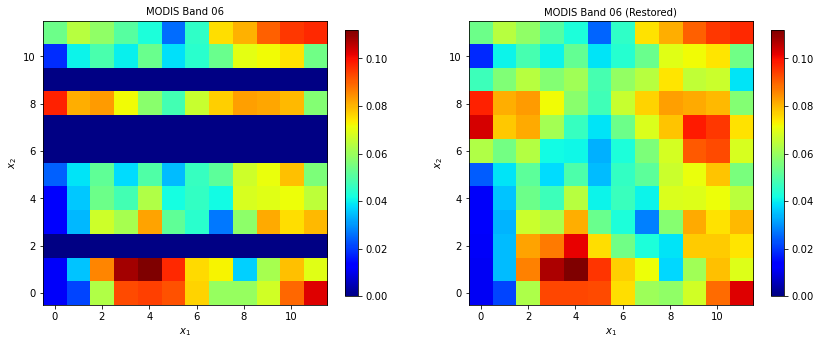

CPU times: user 522 ms, sys: 8.78 ms, total: 531 ms
Wall time: 373 ms


In [50]:
%%time

X1_new, X2_new = np.meshgrid(np.arange(0, 12, 1.0), np.arange(0, 12, 1.0))

X1_new= (1.0*X1_new-x1_min) / (x1_max-x1_min) # data scaling
X2_new= (1.0*X2_new-x2_min) / (x2_max-x2_min) # data scaling

print(X1_new.shape)

X_new = np.stack((X1_new.ravel(),X2_new.ravel()), axis=-1)

print(X_new.shape)

Y_new = model.predict(X_new)

fig, axs = plt.subplots(1,2,gridspec_kw={'hspace': 0.3},figsize=(14,14))

(ax1, ax2) = axs

img = ax1.imshow(data_sample, cmap=cmap, 
                 interpolation='none', origin='lower')

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax1.set_title('MODIS Band 06', fontsize=10)

plt.colorbar(img, ax=ax1, shrink=0.35)

img = ax2.imshow(Y_new.reshape(12,12).T, interpolation='nearest', 
           origin='lower', cmap=cm.jet, vmin=0.0, vmax=y_max)

ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

ax2.set_title('MODIS Band 06 (Restored)', fontsize=10)

plt.colorbar(img, ax=ax2, shrink=0.35)

plt.title('MODIS Band 06 (Restored)', fontsize=10)

plt.show()

(22, 22)
(484, 2)


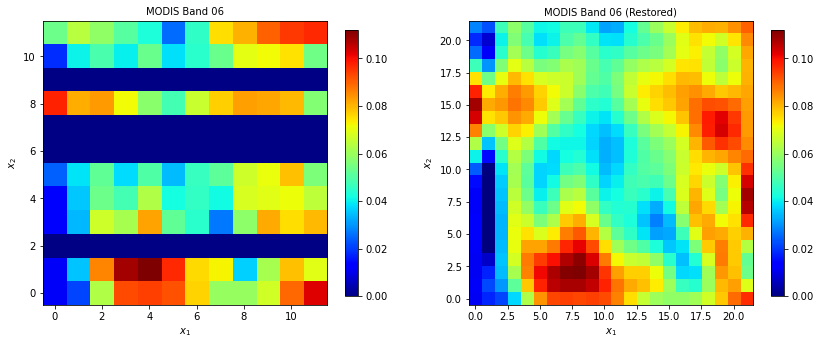

In [51]:
X1_new, X2_new = np.meshgrid(np.arange(0, 11, 0.5), np.arange(0, 11, 0.5))


X1_new= (1.0*X1_new-x1_min) / (x1_max-x1_min) # data scaling
X2_new= (1.0*X2_new-x2_min) / (x2_max-x2_min) # data scaling

print(X1_new.shape)

X_new = np.stack((X1_new.ravel(),X2_new.ravel()), axis=-1)

print(X_new.shape)

Y_new = model.predict(X_new)

fig, axs = plt.subplots(1,2,gridspec_kw={'hspace': 0.3},figsize=(14,14))

(ax1, ax2) = axs

img = ax1.imshow(data_sample, cmap=cmap, 
                 interpolation='none', origin='lower')

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax1.set_title('MODIS Band 06', fontsize=10)

plt.colorbar(img, ax=ax1, shrink=0.35)

img = ax2.imshow(Y_new.reshape(22,22).T, interpolation='nearest', 
           origin='lower', cmap=cm.jet, vmin=0.0, vmax=y_max)

ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

ax2.set_title('MODIS Band 06 (Restored)', fontsize=10)

plt.colorbar(img, ax=ax2, shrink=0.35)

plt.title('MODIS Band 06 (Restored)', fontsize=10)

plt.show()

(40, 40)
(1600, 2)


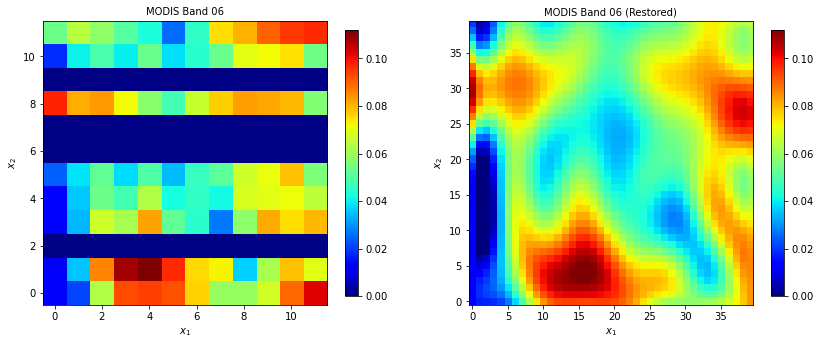

In [52]:
X1_new, X2_new = np.meshgrid(np.arange(0, 10, 0.25), np.arange(0, 10, 0.25))

X1_new= (1.0*X1_new-x1_min) / (x1_max-x1_min) # data scaling
X2_new= (1.0*X2_new-x2_min) / (x2_max-x2_min) # data scaling

print(X1_new.shape)

X_new = np.stack((X1_new.ravel(),X2_new.ravel()), axis=-1)

print(X_new.shape)

Y_new = model.predict(X_new)

fig, axs = plt.subplots(1,2,gridspec_kw={'hspace': 0.3},figsize=(14,14))

(ax1, ax2) = axs

img = ax1.imshow(data_sample, cmap=cmap, 
                 interpolation='none', origin='lower')

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax1.set_title('MODIS Band 06', fontsize=10)

plt.colorbar(img, ax=ax1, shrink=0.35)

img = ax2.imshow(Y_new.reshape(40,40).T, interpolation='nearest', 
           origin='lower', cmap=cm.jet, vmin=0.0, vmax=y_max)

ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

ax2.set_title('MODIS Band 06 (Restored)', fontsize=10)

plt.colorbar(img, ax=ax2, shrink=0.35)

plt.title('MODIS Band 06 (Restored)', fontsize=10)

plt.show()

(48, 2)
(48,)


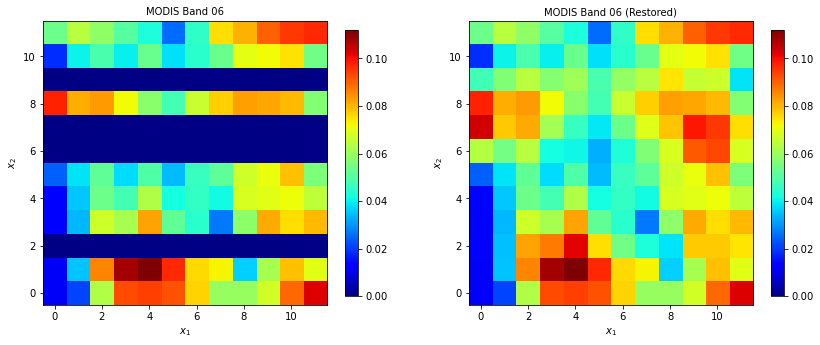

CPU times: user 322 ms, sys: 6.04 ms, total: 328 ms
Wall time: 332 ms


In [53]:
%%time

#X_new = np.stack((np.where(data_sample==0.0)[0],np.where(data_sample==0.0)[1]), axis=-1)

X1_new_unscaled = np.where(data_sample==0.0)[0]
X2_new_unscaled = np.where(data_sample==0.0)[1]

X1_new = (1.0*X1_new_unscaled-x1_min) / (x1_max-x1_min) # data scaling
X2_new = (1.0*X2_new_unscaled-x2_min) / (x2_max-x2_min) # data scaling

X1_new_dim = X1_new.shape

X_new = np.stack((X1_new.ravel(),X2_new.ravel()), axis=-1)

print(X_new.shape)

Y_new = model.predict(X_new)

print(Y_new.shape)

data_band_06[X1_new_unscaled+i_start,X2_new_unscaled+j_start] = Y_new

fig, axs = plt.subplots(1,2,gridspec_kw={'hspace': 0.3},figsize=(14,14))

(ax1, ax2) = axs

img = ax1.imshow(data_sample, cmap=cmap, 
                 interpolation='none', origin='lower')

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax1.set_title('MODIS Band 06', fontsize=10)

plt.colorbar(img, ax=ax1, shrink=0.35)

img = ax2.imshow(data_band_06[i_start:i_start+12,j_start:j_start+12], cmap=cmap, 
                 interpolation='none', origin='lower',vmin=0.0)

ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

ax2.set_title('MODIS Band 06 (Restored)', fontsize=10)

plt.colorbar(img, ax=ax2, shrink=0.35)

plt.title('MODIS Band 06 (Restored)', fontsize=10)

plt.show()

In [54]:
%%time

MODIS_band = 6
    
data_selected_id = modis_band_dic[str(MODIS_band)][0]
band_idx = modis_band_dic[str(MODIS_band)][1]

data = EV_500_Aggr1km_RefSB.get()
data_band_06 = data[band_idx,:,:]
data_selected_attributes = data_selected_id.attributes()
_FillValue = data_selected_attributes['_FillValue']
_FillValue = 65528 # warning wrong _FillValue stored in attributes  

reflectance_scales = data_selected_attributes['reflectance_scales']
data_band_06[ data_band_06 == _FillValue ] = 0.0
data_band_06 = data_band_06 * reflectance_scales[band_idx]

data_shape = data_band_06.shape

i_start = 0
j_start = 0

for i_start in np.arange(0,data_shape[0],10):

    if i_start > data_shape[0] - 10: i_start = data_shape[0] - 10
    
    print(i_start)
    
    for j_start in np.arange(0,data_shape[1],12):
        
        if j_start > data_shape[1] - 12: j_start = data_shape[1] - 12

        #print(i_start,j_start)

        data_sample = data_band_06[i_start:i_start+12,j_start:j_start+12]

        X = np.stack((np.where(data_sample!=0.0)[0],np.where(data_sample!=0.0)[1]), axis=-1)

        Y = data_sample[np.where(data_sample!=0.0)[0],np.where(data_sample!=0.0)[1]]

        x1_min = np.min(X[:,0])
        x1_max = np.max(X[:,0])

        X = X.astype('float64')

        X[:,0] = (1.0*X[:,0]-x1_min) / (x1_max-x1_min)

        x2_min = np.min(X[:,1])
        x2_max = np.max(X[:,1])

        X[:,1] = (1.0*X[:,1]-x2_min) / (x2_max-x2_min)

        X_dim1 = X.shape[0]

        X1 = X[:,0]
        X2 = X[:,1]

        X = np.stack((X1,X2), axis=-1)

        #print(X.shape)
        #print(Y.shape)

        model = gp.fit(X,Y)        

        X1_new_unscaled = np.where(data_sample==0.0)[0]
        X2_new_unscaled = np.where(data_sample==0.0)[1]

        #print(X1_new_unscaled)

        X1_new = (1.0*X1_new_unscaled-x1_min) / (x1_max-x1_min) # data scaling
        X2_new = (1.0*X2_new_unscaled-x2_min) / (x2_max-x2_min) # data scaling

        X_new = np.stack((X1_new,X2_new), axis=-1)

        Y_new = model.predict(X_new)

        data_band_06[X1_new_unscaled+i_start,X2_new_unscaled+j_start] = Y_new

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
CPU times: user 27min 23s, sys: 13.5 s, total: 27min 36s
Wall time: 14min 22s


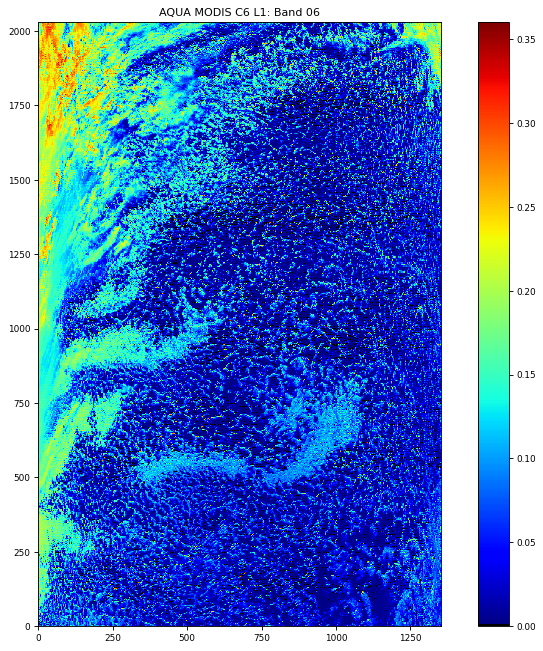

In [56]:
data_band_06[data_band_06<0.0] = 0.0

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

cmap = [(0.0,0.0,0.0)] + [(cm.jet(i)) for i in range(1,256)] 
cmap = mpl.colors.ListedColormap(cmap)

img = plt.imshow(np.fliplr(data_band_06), cmap=cmap, 
                 interpolation='none', origin='lower', vmin=data_band_6_vmin, vmax=data_band_6_vmax)

plt.xticks([0,250,500,750,1000,1250], 
           ['0','250','500', '750', '1000','1250'], rotation=0, fontsize=8 )

plt.yticks([0,250,500,750,1000,1250,1500,1750,2000], 
           ['0','250','500', '750', '1000','1250','1500','1750','2000'], 
           rotation=0, fontsize=8 )

plt.title('AQUA MODIS L1 Band07 \n 2007-08-07; 20h10', fontsize=10)

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)

plt.title('AQUA MODIS C6 L1: Band 06', fontsize=10)

plt.show()

plt.close()